In [342]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%qtconsole

In [343]:
def sigmoid(v):
    #return np.tanh(v)
    return 1/(1+np.exp(-v))

In [344]:
def sigmoid_derivative(v):
    #return 1 - sigmoid(v)**2
    return sigmoid(v)*(1-sigmoid(v))

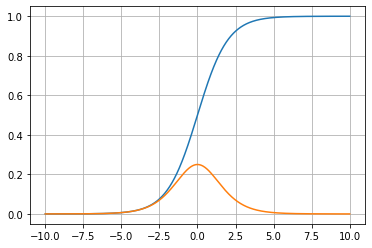

In [346]:
x1 = np.linspace(-10,10,1000)
y1 = [sigmoid(e) for e in x1]
dy1 = [sigmoid_derivative(e) for e in x1]
plt.plot(x1,y1)
plt.plot(x1,dy1)
plt.grid(True)
plt.show()

In [347]:
def mlpclass(y):
    #Retourne les classes de la sortie y 
    if len(y.shape)==1:
        res = np.argmax(y)
    else: 
        res = []
        for i in range(y.shape[1]):
            res.append(np.argmax(y[:,i]))
    return res

In [348]:
def label2target(c,nb_classe):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((nb_classe,n))
    for i in range(n):
        res[c[i],i] = 1
    return res

In [349]:
def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

In [350]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

In [394]:
class NeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, n_out):
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        self.weights     = (np.random.rand(self.input_train.shape[0],n_out)
        -np.random.randint(0,2,(self.input_train.shape[0],n_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        if train == True:
            self.layer = np.dot(self.input_train.T, self.weights)
            self.output = sigmoid(self.layer)
        else:
            self.layer = np.dot(self.input_test.T, self.weights)
            self.output = sigmoid(self.layer)

    def backprop(self, lr):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        self.error =  self.output - self.y_train
        d_weights = lr*np.dot(self.input_train, (2*self.error * sigmoid_derivative(self.layer)))
        # update the weights with the derivative (slope) of the loss function
        self.weights -= d_weights
        
    def train(self, it, lr):
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

In [354]:
Basetrain = np.load('basetrain.npy')
Basetrain = Basetrain/255

Labeltrain = np.load('labeltrain.npy')
Labeltrain = np.array(label2target(Labeltrain,10)).T

Basetest = np.load('basetest.npy')
Basetest = Basetest/255

Labeltest = np.load('labeltest.npy')
Labeltest = np.array(label2target(Labeltest,10)).T

In [426]:
nn = NeuralNetwork(Basetrain,Labeltrain,Basetest,Labeltest, w_sup = 1e-3, n_out=10)

In [427]:
it, lr = 100, 1e-2
nn.train(it,lr)

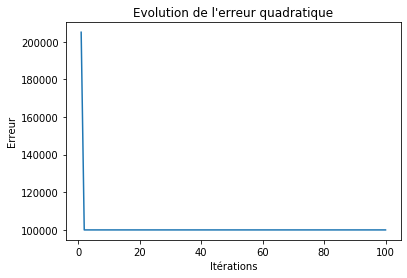

{'nb': 1040, 'taux': 0.1}

In [428]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
nn.test(train = True)

In [359]:
nn.test(train=False)

{'nb': 949, 'taux': 0.47}

In [11]:
class TwoLayersNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, nb_hidden):
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        self.weights1    = np.random.rand(self.input_train.shape[0],nb_hidden)*w_sup
        self.weights2    = np.random.rand(nb_hidden,10)*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        if train == True:
            self.layer1   = np.dot(self.input_train.T, self.weights1)
            self.output1  = sigmoid(self.layer1)
            self.layer2   = np.dot(self.output1, self.weights2)
            self.output2  = sigmoid(self.layer2)
        else:
            self.layer1   = np.dot(self.input_test.T, self.weights1)
            self.output1  = sigmoid(self.layer1)
            self.layer2   = np.dot(self.output1, self.weights2)
            self.output2  = sigmoid(self.layer2)

    def backprop(self, lr):
        self.error = self.output2 - self.y_train
        delta2 = 2*self.error * sigmoid_derivative(self.layer2)
        d_weights2 = lr*np.dot(self.output1.T, delta2)
        delta1 = sigmoid_derivative(self.layer1)*np.dot(delta2,self.weights2.T)
        d_weights1 = lr*np.dot(self.input_train, delta1)
        self.weights1 -= d_weights1
        self.weights2 -= d_weights2
                
    def train(self, it, lr):
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

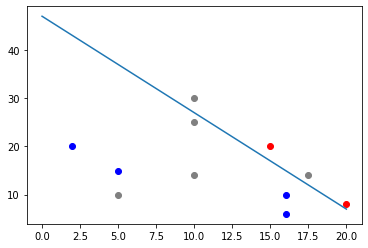

In [246]:
X = np.array([[20,15,16,5,16,2],[8,20,10,15,6,20]])
Y = np.array([0,0,1,1,1,1]).T
Y = np.reshape(Y,(6,1))
XX = np.array([[5,10,17.5,10,10],[10,14,14,25,30]])
YY = np.array([1,1,0,1,0]).T
YY = np.reshape(YY,(5,1))
x = np.linspace(0,20,100)
y = [47 - 2*e for e in x]
plt.plot(X[0][0:2],X[1][0:2],'o',color='red')
plt.plot(X[0][2:6],X[1][2:6],'o',color='blue')
plt.plot(XX[0],XX[1],'o',color='gray')
plt.plot(x,y)
plt.show()

In [340]:
nn = NeuralNetwork(X,Y,XX,YY, w_sup = 1e-3, n_out = 1)
it, lr = 2000, 1e-3
nn.train(it,lr)

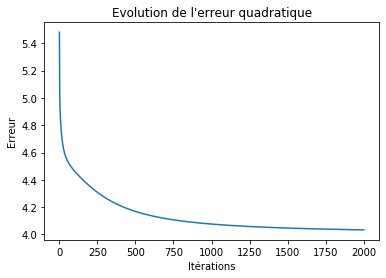

{'nb': 4, 'taux': 0.67} [0 0 0 1 0 1]


In [341]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
print(nn.test(train = True),nn.pred)

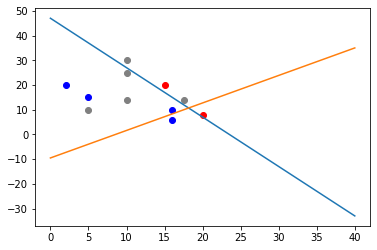

In [250]:
X = np.array([[20,15,16,5,16,2],[8,20,10,15,6,20]])
Y = np.array([-1,-1,1,1,1,1]).T
Y = np.reshape(Y,(6,1))
XX = np.array([[5,10,17.5,10,10],[10,14,14,25,30]])
YY = np.array([1,1,-1,1,-1]).T
YY = np.reshape(YY,(5,1))
x = np.linspace(0,40,100)
y = [47 - 2*e for e in x]
b = -nn.weights[0][0]/nn.weights[2][0]
c = -(nn.weights[1][0]/nn.weights[2][0])
yy = [b+c*e for e in x]
plt.plot(X[0][0:2],X[1][0:2],'o',color='red')
plt.plot(X[0][2:6],X[1][2:6],'o',color='blue')
plt.plot(XX[0],XX[1],'o',color='gray')
plt.plot(x,y)
plt.plot(x,yy)
plt.show()

In [200]:
nn.test(train=False)

{'nb': 4, 'taux': 0.8}

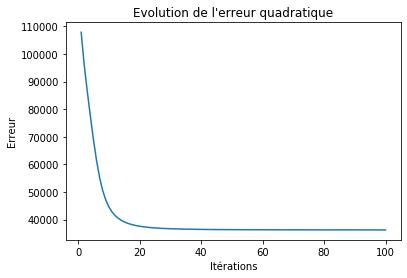

{'nb': 1038, 'taux': 0.1}

In [17]:
twonn = TwoLayersNeuralNetwork(Basetrain,Labeltrain,Basetest,Labeltest, w_sup = 1e-2,nb_hidden=20)
it, lr = 100, 1e-6
twonn.train(it,lr)
iterations = np.linspace(1,it,it)
plt.plot(iterations,twonn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
twonn.test(train = True)